In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [3]:
df = pd.read_csv('hours_studied.csv')
df.head()

,hours_studied,marks
0,1.2,23.5
1,3.7,45.2
2,5.5,58.8
3,2.1,31.4
4,8.3,72.1


In [48]:
class GradientDescent:
    def __init__(self,alpha=.01,iterations=1000):
        self.alpha = alpha
        self.iterations = iterations
        self.w = 0.0
        self.b = 0.0

    def cost_function(self,X_train,y_train):
        total_cost = 0
        for i in range(X_train.shape[0]):
            f = self.w*X_train[i] + self.b
            f = (f - y_train[i]) * (f - y_train[i])
            total_cost += f
        total_cost /= (2*X_train.shape[0])
        return total_cost

    def gradient_function(self,X_train,y_train):
        d_dw = 0.0
        d_db = 0.0
        for i in range(X_train.shape[0]):
            f = self.w * X_train[i] + self.b
            d_dw += (f - y_train[i]) * X_train[i]
            d_db += (f - y_train[i])

        d_dw /= X_train.shape[0]
        d_db /= X_train.shape[0]

        return d_dw,d_db

    def fit(self,X_train,y_train):
        X_train = X_train.to_numpy().ravel()
        y_train = y_train.to_numpy().ravel()
        for i in range(self.iterations):
            d_dw,d_db = self.gradient_function(X_train,y_train)
            self.w = self.w - self.alpha*d_dw
            self.b = self.b - self.alpha*d_db
        return self


    def predict(self,X_test):
        X_test = X_test.to_numpy().ravel()
        return self.w * X_test + self.b

In [51]:
X_train,X_test,y_train,y_test = train_test_split(df['hours_studied'],df['marks'],test_size=.2,random_state=42)

lr = GradientDescent(alpha=0.01,iterations=1000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.7743836984019046

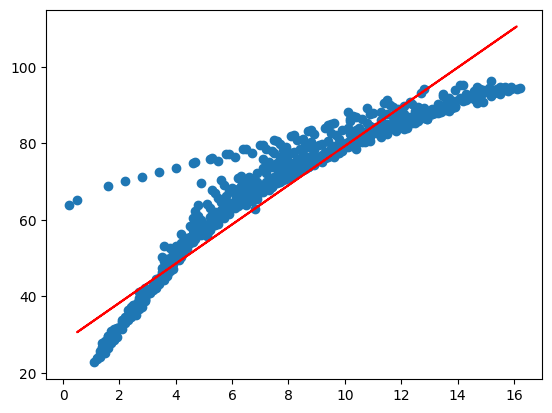

In [53]:
plt.scatter(df['hours_studied'],df['marks'])
plt.plot(X_test,y_pred,color='r')
plt.show()